# Pathway Analysis

### Jack Q. Hu (jackqhu@umich.edu)

BIOINF575 Final Project - analyzing gene pathways & their interactions using KEGG database

Michigan Medicine, Department of Computational Medicine & Biology (DCMB)

## Project Overview
This project focuses on analyzing gene pathway interactions and cross-talk using KEGG pathway data. Key features include:
- Computation of overlapping genes between pathways
- Gene ranking based on pathway appearances
- Analysis of top genes and their pathway interactions
- Visualization of pathway overlaps using Venn diagrams
- Enrichment analysis using GSEA
- Interactive network visualization of gene-pathway interactions

## Repository Structure
```
.
├── data/
│   ├── input/
│   │   ├── gene_to_pathway.txt
│   │   ├── pathway_names.txt
│   │   └── symbol_gene_info.txt
│   └── output/
│       ├── KEGG_crosstalk.csv
│       ├── gene_pathway_rank.csv
│       └── top_3_genes_pathways.txt
├── src/
│   ├── __init__.py
│   ├── pathway_analysis.py
│   ├── visualization.py
│   └── enrichment_analysis.py
├── notebooks/
│   └── pathway_analysis.ipynb
├── results/
│   ├── figures/
│   │   ├── venn_diagram.png
│   │   └── gene_pathway_network.html
│   └── enrichment/
│       └── gsea_results.csv
├── requirements.txt
├── README.md
└── LICENSE
```

## Installation
```bash
# Clone the repository
git clone https://github.com/yourusername/bioinf575-pathway-analysis.git
cd bioinf575-pathway-analysis

# Create and activate virtual environment (optional but recommended)
python -m venv venv
source venv/bin/activate  # On Windows, use: venv\Scripts\activate

# Install dependencies
pip install -r requirements.txt
```

## Dependencies
- pandas
- matplotlib
- matplotlib-venn
- gseapy
- bioservices
- pyvis
- networkx

## Usage
The main analysis can be run either through the Jupyter notebook or the Python scripts:

```python
# Using the Python scripts
from src.pathway_analysis import analyze_pathways
from src.visualization import create_venn_diagram
from src.enrichment_analysis import run_gsea

# Run analysis
analyze_pathways(input_file='data/input/gene_to_pathway.txt')
```

## License
This project is licensed under the MIT License - see the LICENSE file for details.

## Acknowledgments
- BIOINF575 Course Staff
- Department of Computational Medicine & Biology, Michigan Medicine
- KEGG Database for pathway data

## Citation
If you use this code in your research, please cite:
```bibtex
@software{bioinf575_pathway_analysis,
  author = {Your Name and Bolden, Geordan and Sens, Matthew and Hu, Jack},
  title = {BIOINF575 Pathway Analysis Project},
  year = {2024},
  institution = {University of Michigan},
  department = {Department of Computational Medicine & Biology}
}
```

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
file1 = 'gdrive/MyDrive/Colab Notebooks/gene_to_pathway.txt'
file2 = 'gdrive/MyDrive/Colab Notebooks/pathway_names.txt'
file3 = 'gdrive/MyDrive/Colab Notebooks/symbol_gene_info.txt'

In [ ]:
gene_to_pathway = pd.read_csv(file1, sep = "\t", header = None, names = ["GENE_ID","PATHWAY_ID"])
pathway_names = pd.read_csv(file2, sep = "\t", header = None, names = ["PATHWAY_ID","PATHWAY_NAME"])
symbol_gene_info = pd.read_csv(file3, sep = "\t", header = None, names = ["GENE_ID", "TYPE", "TYPE_DESCRIPTION", "GENE_INFO"])

In [ ]:
pathway_names['PATHWAY_ID'] = pathway_names['PATHWAY_ID'].str.replace(r'^hsa', 'path:hsa', regex = True)

In [ ]:
merge_1 = pd.merge(gene_to_pathway, symbol_gene_info, on = "GENE_ID").dropna()

In [ ]:
merge_2 = pd.merge(merge_1, pathway_names, on = "PATHWAY_ID")

In [ ]:
#Step 2: Compute the number of overlapping genes between every 2 pathways.
# END RESULT: PATHWAY_ID1, PATHWAY_NAME1, PATHWAY_ID2, PATHWAY_NAME2, NUMBER_OF_OVERLAPPING_GENES, LIST_OF_OVERLAPPING_GENES

In [ ]:
pathway_names_dict = merge_2.groupby('PATHWAY_ID')['PATHWAY_NAME'].apply(set).to_dict()

In [ ]:
pathway_genes_dict = merge_2.groupby('PATHWAY_ID')['GENE_ID'].apply(set).to_dict()

In [ ]:
pathway_genes_dict = merge_2.groupby('PATHWAY_ID')['GENE_ID'].apply(set).to_dict()

In [ ]:
overlap_list = []
pathway_ids = list(pathway_genes_dict.keys())
for i in range(len(pathway_ids)):
    for j in range(i + 1, len(pathway_ids)):
        pathway_id1 = pathway_ids[i]
        pathway_id2 = pathway_ids[j]

        genes1 = pathway_genes_dict[pathway_id1]
        genes2 = pathway_genes_dict[pathway_id2]

        pathway_name1 = pathway_names_dict[pathway_id1] if pathway_id1 in pathway_names_dict else "Unknown"
        pathway_name2 = pathway_names_dict[pathway_id2] if pathway_id2 in pathway_names_dict else "Unknown"

        overlapping_genes = genes1.intersection(genes2)
        num_overlapping_genes = len(overlapping_genes)

        if num_overlapping_genes > 0:
            overlap_list.append({
                "PATHWAY_ID1": pathway_id1,
                "PATHWAY_NAME1":pathway_name1,
                "PATHWAY_ID2": pathway_id2,
                "PATHWAY_NAME2":pathway_name2,
                "NUMBER_OF_OVERLAPPING_GENES": num_overlapping_genes,
                "LIST_OF_OVERLAPPING_GENES": list(overlapping_genes)
            })

In [ ]:
overlap_df = pd.DataFrame(overlap_list)
overlap_df

,PATHWAY_ID1,PATHWAY_NAME1,PATHWAY_ID2,PATHWAY_NAME2,NUMBER_OF_OVERLAPPING_GENES,LIST_OF_OVERLAPPING_GENES
0,path:hsa00010,{Glycolysis / Gluconeogenesis - Homo sapiens (...,path:hsa00020,{Citrate cycle (TCA cycle) - Homo sapiens (hum...,7,"[hsa:1737, hsa:5105, hsa:5162, hsa:5106, hsa:5..."
1,path:hsa00010,{Glycolysis / Gluconeogenesis - Homo sapiens (...,path:hsa00030,{Pentose phosphate pathway - Homo sapiens (hum...,11,"[hsa:229, hsa:8789, hsa:5214, hsa:5211, hsa:28..."
2,path:hsa00010,{Glycolysis / Gluconeogenesis - Homo sapiens (...,path:hsa00040,{Pentose and glucuronate interconversions - Ho...,1,[hsa:10327]
3,path:hsa00010,{Glycolysis / Gluconeogenesis - Homo sapiens (...,path:hsa00051,{Fructose and mannose metabolism - Homo sapien...,13,"[hsa:229, hsa:8789, hsa:5214, hsa:5211, hsa:30..."
4,path:hsa00010,{Glycolysis / Gluconeogenesis - Homo sapiens (...,path:hsa00052,{Galactose metabolism - Homo sapiens (human)},14,"[hsa:92579, hsa:2645, hsa:5214, hsa:5211, hsa:..."
...,...,...,...,...,...,...
22213,path:hsa05415,{Diabetic cardiomyopathy - Homo sapiens (human)},path:hsa05417,{Lipid and atherosclerosis - Homo sapiens (hum...,39,"[hsa:5296, hsa:6300, hsa:4689, hsa:817, hsa:55..."
22214,path:hsa05415,{Diabetic cardiomyopathy - Homo sapiens (human)},path:hsa05418,{Fluid shear stress and atherosclerosis - Homo...,28,"[hsa:5296, hsa:6300, hsa:5599, hsa:207, hsa:15..."
22215,path:hsa05416,{Viral myocarditis - Homo sapiens (human)},path:hsa05417,{Lipid and atherosclerosis - Homo sapiens (hum...,9,"[hsa:842, hsa:5879, hsa:3383, hsa:959, hsa:958..."
22216,path:hsa05416,{Viral myocarditis - Homo sapiens (human)},path:hsa05418,{Fluid shear stress and atherosclerosis - Homo...,8,"[hsa:5880, hsa:5881, hsa:71, hsa:5879, hsa:338..."


In [ ]:
# step 3: Save the result to a file KEGG_crosstalk.csv with the following columns:

In [ ]:
overlap_df.to_csv('KEGG_crosstalk.csv', sep = '\t', index = False)




In [ ]:
#4. Compute a rank of the genes based on how many pathways they appear on and save it to a file.

from collections import Counter

# Create a dictionary to count gene occurrences across pathways
gene_pathway_count = Counter()

# Count the number of pathways each gene appears in
for genes in pathway_genes_dict.values():
    gene_pathway_count.update(genes)

# Create a list of dictionaries with gene information
gene_rank_list = [
    {
        "GENE": gene,
        "PATHWAY_COUNT": count,
        "PATHWAYS": [
            pathway_id for pathway_id, genes in pathway_genes_dict.items() if gene in genes
        ]
    }
    for gene, count in gene_pathway_count.items()
]

# Create a DataFrame from the list
gene_rank_df = pd.DataFrame(gene_rank_list)

# Sort the DataFrame by pathway count in descending order
gene_rank_df = gene_rank_df.sort_values("PATHWAY_COUNT", ascending=False).reset_index(drop=True)

# Add a rank column
gene_rank_df["RANK"] = gene_rank_df.index + 1

# Reorder columns
gene_rank_df = gene_rank_df[["RANK", "GENE", "PATHWAY_COUNT", "PATHWAYS"]]

# Save the DataFrame to a CSV file
output_file = "gene_pathway_rank.csv"
gene_rank_df.to_csv(output_file, index=False)

print(f"Gene pathway rank has been saved to {output_file}")

# Display the first few rows of the DataFrame
print(gene_rank_df.head())




Gene pathway rank has been saved to gene_pathway_rank.csv
   RANK      GENE  PATHWAY_COUNT  \
0     1  hsa:5594            118   
1     2  hsa:5595            118   
2     3  hsa:5291            106   
3     4  hsa:5293            106   
4     5  hsa:5290            106   

                                            PATHWAYS  
0  [path:hsa01521, path:hsa01522, path:hsa01524, ...  
1  [path:hsa01521, path:hsa01522, path:hsa01524, ...  
2  [path:hsa00562, path:hsa01100, path:hsa01521, ...  
3  [path:hsa00562, path:hsa01100, path:hsa01521, ...  
4  [path:hsa00562, path:hsa01100, path:hsa01521, ...  


In [ ]:
#5. Retrieve a set of the pathways the top 3 genes appear on.


In [ ]:


# Get the top 3 genes
top_3_genes = gene_rank_df['GENE'].head(3).tolist()

# Initialize a set to store unique pathways
top_3_pathways = set()

# Iterate through the top 3 genes and add their pathways to the set
for gene in top_3_genes:
    gene_pathways = gene_rank_df[gene_rank_df['GENE'] == gene]['PATHWAYS'].iloc[0]
    top_3_pathways.update(gene_pathways)

# Print the results
print(f"Top 3 genes: {', '.join(top_3_genes)}")
print(f"Number of unique pathways for top 3 genes: {len(top_3_pathways)}")
print("Pathways:")
for pathway in sorted(top_3_pathways):
    print(f"- {pathway}")

# Optionally, save the pathways to a file
with open('top_3_genes_pathways.txt', 'w') as f:
    f.write(f"Top 3 genes: {', '.join(top_3_genes)}\n")
    f.write(f"Number of unique pathways: {len(top_3_pathways)}\n")
    f.write("Pathways:\n")
    for pathway in sorted(top_3_pathways):
        f.write(f"- {pathway}\n")

print("Pathways for top 3 genes have been saved to 'top_3_genes_pathways.txt'")

Top 3 genes: hsa:5594, hsa:5595, hsa:5291
Number of unique pathways for top 3 genes: 140
Pathways:
- path:hsa00562
- path:hsa01100
- path:hsa01521
- path:hsa01522
- path:hsa01524
- path:hsa04010
- path:hsa04012
- path:hsa04014
- path:hsa04015
- path:hsa04022
- path:hsa04024
- path:hsa04062
- path:hsa04066
- path:hsa04068
- path:hsa04070
- path:hsa04071
- path:hsa04072
- path:hsa04114
- path:hsa04140
- path:hsa04148
- path:hsa04150
- path:hsa04151
- path:hsa04152
- path:hsa04210
- path:hsa04211
- path:hsa04213
- path:hsa04218
- path:hsa04261
- path:hsa04270
- path:hsa04350
- path:hsa04360
- path:hsa04370
- path:hsa04371
- path:hsa04380
- path:hsa04510
- path:hsa04520
- path:hsa04540
- path:hsa04550
- path:hsa04611
- path:hsa04613
- path:hsa04620
- path:hsa04621
- path:hsa04625
- path:hsa04630
- path:hsa04650
- path:hsa04657
- path:hsa04658
- path:hsa04659
- path:hsa04660
- path:hsa04662
- path:hsa04664
- path:hsa04666
- path:hsa04668
- path:hsa04670
- path:hsa04713
- path:hsa04720
- pat

In [ ]:
# 6. Compute and display a Venn diagram for number of overlapping pathways for the top 3 genes.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [ ]:
def find_gene_pathways(gene_id, pathway_dict):
    '''
    Args:
        gene_id (str): identifier of gene to search for (e.g. 'hsa:5595')
        pathway_dict (dict): mapping of pathway IDs to gene IDs sets
          e.g. {'path:hsa00010': {'hsa:5595', 'hsa:5594'}

    Returns:
        set: pathway IDs which contain specified gene
            e.g. {'path:hsa00010', 'path:hsa00020', ...}
    '''

    gene_pathways = set()
    for pathway_id, genes in pathway_dict.items():
        if gene_id in genes:
            gene_pathways.add(pathway_id)
    return gene_pathways

In [ ]:
# Retrieve top3 genes
gene_rank_df = pd.DataFrame(gene_rank_list)
gene_rank_df = gene_rank_df.sort_values("PATHWAY_COUNT", ascending=False).reset_index(drop=True)
top3_genes = gene_rank_df['GENE'].head(3).tolist()

In [ ]:
# Retrieve pathway sets
gene1_pathways = find_gene_pathways(top3_genes[0], pathway_genes_dict)
gene2_pathways = find_gene_pathways(top3_genes[1], pathway_genes_dict)
gene3_pathways = find_gene_pathways(top3_genes[2], pathway_genes_dict)

Text(0.5, 1.0, 'Pathway Overlap b/t Top3 Genes')

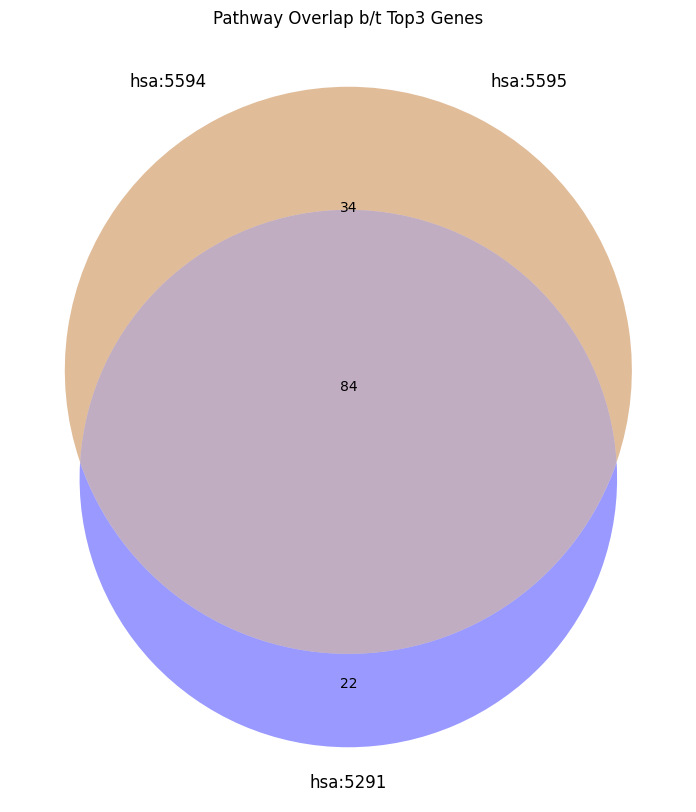

In [ ]:
# plot Venn diagram
plt.figure(figsize=(10, 10))
venn3([gene1_pathways, gene2_pathways, gene3_pathways],
      set_labels=[top_3_genes[0], top_3_genes[1], top_3_genes[2]])
plt.title('Pathway Overlap b/t Top3 Genes')

In [ ]:
plt.savefig('venn_diagram.png')
plt.close()

In [ ]:
print(f"\nTotal pathways for each gene:")
print(f"{top3_genes[0]}: {len(gene1_pathways)}")
print(f"{top3_genes[1]}: {len(gene2_pathways)}")
print(f"{top3_genes[2]}: {len(gene3_pathways)}")
print(f"\nPathways shared by all three genes: {len(gene1_pathways & gene2_pathways & gene3_pathways)}")


Total pathways for each gene:
hsa:5594: 118
hsa:5595: 118
hsa:5291: 106

Pathways shared by all three genes: 84


In [ ]:
# Geordan's Invidual Feature
# Question : What function do those pathways within the top 3 genes serve?

In [ ]:
#!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.5/548.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
#!pip install bioservices

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.9/191.9 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 11.9 MB/s eta 0:00:00
  Created wheel for bioservices: filename=bioservices-1.11.2-py3-none-any.whl size=223228 sha256=e319632add5a412dc5491c5cd56bb2406c0b6b5cf9c06e92a36765195018a6b3
  Stored in directory: /root/.cache/pip/wheels/bf/ac/b3/dc05e53581bbb58641e9ac5242

In [ ]:
import gseapy as gp
import matplotlib.pyplot as plt
from bioservices import KEGG
# bioservices used to convert gene labels to symbols

In [ ]:
k = KEGG()
# function used to reformat the gene_ids to gene symbols
def gene_symbol_conv (gene_ids):
  gene_symbols = []
  for gene_id in gene_ids:
      print(gene_id)
      data = k.get(gene_id)
      dict_data = k.parse(data)
      symbol_entry = dict_data['SYMBOL']
      first_symbol = symbol_entry.split(",")[0].strip()
      gene_symbols.append(first_symbol)
  return(gene_symbols)
# Learned that enrichr only takes only the gene symbols not the KEGG gene_ids

Creating directory /root/.cache/bioservices 
Welcome to Bioservices
It looks like you do not have a configuration file.
We are creating one with default values in /root/.config/bioservices/bioservices.cfg .
Done


In [ ]:
 gene_symbols = gene_symbol_conv(top_3_genes)

hsa:5594
hsa:5595
hsa:5291


In [ ]:
print(gene_symbols)

['MAPK1', 'MAPK3', 'PIK3CB']


In [ ]:
# running the GSEA using multiple hypothesis testing, with a pvalue cutoff

results = gp.enrichr(gene_list=gene_symbols,
                     gene_sets = ['KEGG_2016', 'KEGG_2013'],
                     cutoff = 0.05,
                     top_term = 10,
                     no_plot = True
                    )
#results.res2d.head(5)

In [ ]:
results.res2d.head(10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2013,HSA04930 TYPE II DIABETES MELLITUS,3/44,9.932882e-09,1.488238e-07,0,0,59868.0,1.103212e+06,MAPK1;PIK3CB;MAPK3
1,KEGG_2013,HSA04150 MTOR SIGNALING PATHWAY,3/48,1.297191e-08,1.488238e-07,0,0,59856.0,1.087014e+06,MAPK1;PIK3CB;MAPK3
2,KEGG_2013,HSA05213 ENDOMETRIAL CANCER,3/52,1.657495e-08,1.488238e-07,0,0,59844.0,1.072128e+06,MAPK1;PIK3CB;MAPK3
3,KEGG_2013,HSA05221 ACUTE MYELOID LEUKEMIA,3/53,1.756946e-08,1.488238e-07,0,0,59841.0,1.068587e+06,MAPK1;PIK3CB;MAPK3
4,KEGG_2013,HSA05223 NON SMALL CELL LUNG CANCER,3/54,1.860298e-08,1.488238e-07,0,0,59838.0,1.065113e+06,MAPK1;PIK3CB;MAPK3
5,KEGG_2013,HSA05214 GLIOMA,3/64,3.124824e-08,1.757528e-07,0,0,59808.0,1.033560e+06,MAPK1;PIK3CB;MAPK3
6,KEGG_2013,HSA05211 RENAL CELL CARCINOMA,3/69,3.929595e-08,1.757528e-07,0,0,59793.0,1.019599e+06,MAPK1;PIK3CB;MAPK3
7,KEGG_2013,HSA04370 VEGF SIGNALING PATHWAY,3/70,4.105550e-08,1.757528e-07,0,0,59790.0,1.016929e+06,MAPK1;PIK3CB;MAPK3
8,KEGG_2013,HSA05218 MELANOMA,3/71,4.286680e-08,1.757528e-07,0,0,59787.0,1.014297e+06,MAPK1;PIK3CB;MAPK3
9,KEGG_2013,HSA05212 PANCREATIC CANCER,3/73,4.664766e-08,1.757528e-07,0,0,59781.0,1.009142e+06,MAPK1;PIK3CB;MAPK3


In [ ]:
from gseapy.plot import dotplot

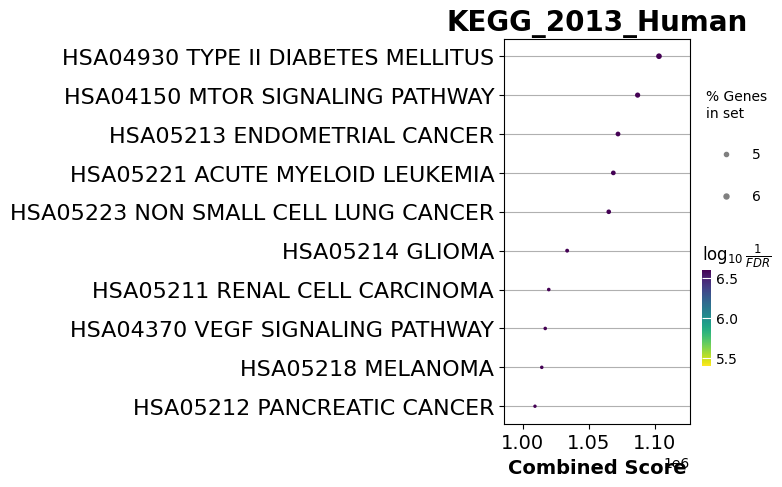

In [ ]:
ax = dotplot(results.res2d, x = "Count", title='KEGG_2013_Human', cmap='viridis_r', size=10, figsize=(3,5))

Results/Discussion:

The GeneList input we are using is the Top 3 Genes ranked by the number of pathways they contain. Using the genes with most amount of pathways under them, I asked What biological processes are supported by such a large number pathways under a small amount of genes ? For the gene set, we used the KEGG_2013 library and the hsa organism's genes is used as the background.

The result of my GSEA were overlaps with large biological processes with no real specific way to telling location or any biochemical mechanism. While information is helpful and statistically significant based on the adjusted pvalues, it only points at multiple broad fields with no direction. No meaningful inferances can be made from these results. Dot plot serves show the level of "combined score" per overlap for each gene. The combined score essentially tells us the biological relavance per overlap gene.

This is entirely expected when using broad house keeping genes such as MAPK1, MAPK3, and PIK3CD. The mitogen-activated kinase pathway (MAPK) is an important mediator of extracellular signals to interior response. It is a large signaling pathway consisting of a cascade of enzymes that supports physiological processes such as amplification of key molecule that sustain cell proliferation, growth and survival processes (1). The PIK3CD is also a house keeping gene that serves a regulatory immunology role. This would align with half of top 10 statistically significant overlaps being "Cancer" related.


1.	 Plotnikov A., Flores K., Maik-Rachline G., Zehorai E., Kapri-Pardes E., Berti D.A., Hanoch T., Besser M.J., Seger R. The nuclear translocation of ERK1/2 as an anticancer target. Nat. Commun. 2015;6:6685. doi: 10.1038/ncomms7685







In [ ]:
#Matthew's Individual Feature
#Building a diagram of the largest ten pathways and the genes they interact with

In [ ]:
#pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00


In [ ]:
import networkx as nx
from pyvis.network import Network
import pandas as pd
from google.colab import files
from IPython.display import IFrame, display, HTML

# Assuming gene_rank_df is your original DataFrame
# Get the top 10 pathways
top_10_pathways = gene_rank_df['PATHWAYS'].explode().value_counts().nlargest(10).index.tolist()

# Create a new graph
G = nx.Graph()

# Add nodes and edges
for _, row in gene_rank_df.iterrows():
    gene = row['GENE']
    pathways = row['PATHWAYS']

    # Add gene node
    G.add_node(gene, color='#00ff00', size=20, title=f"Gene: {gene}")

    # Add pathway nodes and edges
    for pathway in pathways:
        if pathway in top_10_pathways:
            G.add_node(pathway, color='#ff0000', size=30, title=f"Pathway: {pathway}")
            G.add_edge(gene, pathway)

# Create a Pyvis network from our Networkx graph
net = Network(notebook=True, width="100%", height="600px", bgcolor="#222222", font_color="white", cdn_resources="remote")
net.from_nx(G)

# Set physics layout
net.barnes_hut(gravity=-2000, central_gravity=0.3, spring_length=200, spring_strength=0.05, damping=0.09, overlap=0)

# Save and show the graph
net.show("gene_pathway_network.html")

# Display the graph in Colab
display(HTML('gene_pathway_network.html'))

# Optionally, allow downloading the HTML file
files.download('gene_pathway_network.html')

gene_pathway_network.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>